In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [105]:
# !conda install -c conda-forge odfpyr

In [2]:
filepath = "../dados/Registros Administrativos/dados_registros_administrativos_total_2012_2017.xlsx.xlsx"
df = pd.read_excel(filepath, sheet_name="MUNICÍPIO")

In [4]:
df.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,...,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
0,2013,TOTAL,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,0.74,NaN,25.8,29.6,...,100.0,0.51,66.02,20.00,0.0,NaN,NaN,NaN,NaN,25728
1,2013,TOTAL,1100023,Ariquemes,91.12,94.80,8.88,5.20,24.5,27.1,...,100.0,0.49,34.67,7.69,0.0,NaN,NaN,NaN,NaN,101269
2,2013,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,18.1,18.7,...,100.0,0.13,32.01,11.11,0.0,NaN,NaN,NaN,NaN,6495
3,2013,TOTAL,1100049,Cacoal,85.55,82.90,14.45,17.10,19.3,24.6,...,100.0,0.13,37.07,8.33,0.0,NaN,NaN,NaN,NaN,85863
4,2013,TOTAL,1100056,Cerejeiras,97.18,97.47,2.82,2.53,21.1,21.1,...,NaN,0.19,63.12,0.00,0.0,NaN,NaN,NaN,NaN,18041


In [5]:
df.ANO.unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [6]:
columns = ['ANO','IBGE7','PMATPUB_EF','PMATPUB_EM','PMATPRI_EF','PMATPRI_EM','IDEB_AI','IDEB_AF',
'REN_PIBPC_D','REN_VAPC_D','REN_PVAAGR','REN_PVAIND','REN_PVAADM','REN_PVASERV','REN_RENSF_D',
'PDEFSAN','PANALF15','PFOCOS','PFLORA']

In [27]:
def reg_adm_query(ano, df=df):
    '''
    
    '''
    df_ano = df.loc[df['ANO'].isin([ano])]
#     df_ano = df.query("""ANO == {}""".format(ano))
    df_ano = df_ano.loc[:,columns]
    return df_ano, df_ano.isnull().sum()

In [52]:
reg_adm_query(2017)[1]

ANO               0
IBGE7             0
PMATPUB_EF        0
PMATPUB_EM        9
PMATPRI_EF     2551
PMATPRI_EM     3993
IDEB_AI          94
IDEB_AF         108
REN_PIBPC_D    5570
REN_VAPC_D     5570
REN_PVAAGR     5570
REN_PVAIND     5570
REN_PVAADM     5570
REN_PVASERV    5570
REN_RENSF_D       0
PDEFSAN         121
PANALF15          2
PFOCOS          141
PFLORA            0
dtype: int64

In [55]:
df_2017 = reg_adm_query(2017)[0].loc[:,['IBGE7','PMATPUB_EF','PMATPUB_EM','PMATPRI_EF','PMATPRI_EM',
                                        'IDEB_AI','IDEB_AF','REN_RENSF_D','PDEFSAN','PANALF15','PFOCOS','PFLORA']]

In [56]:
df_2016 = reg_adm_query(2016)[0].loc[:,['IBGE7','REN_PIBPC_D','REN_VAPC_D',
                                        'REN_PVAAGR','REN_PVAIND','REN_PVAADM','REN_PVASERV']]

In [57]:
reg_adm = df_2017.merge(df_2016, how='left', on='IBGE7')

In [61]:
reg_adm.loc[:,['PMATPUB_EM','PMATPRI_EF','PMATPRI_EM']] = reg_adm.loc[:,['PMATPUB_EM','PMATPRI_EF','PMATPRI_EM']].fillna(0)

In [62]:
reg_adm.isnull().sum()

IBGE7            0
PMATPUB_EF       0
PMATPUB_EM       0
PMATPRI_EF       0
PMATPRI_EM       0
IDEB_AI         94
IDEB_AF        108
REN_RENSF_D      0
PDEFSAN        121
PANALF15         2
PFOCOS         141
PFLORA           0
REN_PIBPC_D      0
REN_VAPC_D       0
REN_PVAAGR       0
REN_PVAIND       0
REN_PVAADM       0
REN_PVASERV      0
dtype: int64

In [63]:
corr = reg_adm.corr()
corr.style.background_gradient(cmap='coolwarm')

,IBGE7,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,IDEB_AI,IDEB_AF,REN_RENSF_D,PDEFSAN,PANALF15,PFOCOS,PFLORA,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV
IBGE7,1.000000,0.001632,-0.054308,-0.001631,0.077805,0.478019,0.465429,0.348774,-0.385198,-0.382792,-0.114497,-0.345330,0.386994,0.394022,0.280119,0.204061,-0.576314,0.195387
PMATPUB_EF,0.001632,1.000000,0.627067,-1.000000,-0.748335,0.021668,0.048130,-0.240702,0.281022,0.093127,0.017151,0.137697,-0.099063,-0.073874,0.414320,-0.225280,0.243168,-0.590887
PMATPUB_EM,-0.054308,0.627067,1.000000,-0.627067,-0.847673,-0.104260,-0.066858,-0.235424,0.229818,0.134262,-0.009473,0.100318,-0.129889,-0.111097,0.244396,-0.183583,0.245471,-0.428833
PMATPRI_EF,-0.001631,-1.000000,-0.627067,1.000000,0.748335,-0.021667,-0.048129,0.240702,-0.281022,-0.093126,-0.017151,-0.137697,0.099063,0.073874,-0.414320,0.225280,-0.243168,0.590887
PMATPRI_EM,0.077805,-0.748335,-0.847673,0.748335,1.000000,0.126671,0.079797,0.295621,-0.261481,-0.182135,0.014367,-0.118057,0.159534,0.136912,-0.307430,0.229264,-0.299421,0.529006
IDEB_AI,0.478019,0.021668,-0.104260,-0.021667,0.126671,1.000000,0.789798,0.241829,-0.387467,-0.459735,-0.127984,-0.334295,0.323112,0.323550,0.106616,0.246509,-0.532042,0.308709
IDEB_AF,0.465429,0.048130,-0.066858,-0.048129,0.079797,0.789798,1.000000,0.226554,-0.316410,-0.397118,-0.076251,-0.211811,0.311675,0.313240,0.160338,0.196737,-0.472520,0.214145
REN_RENSF_D,0.348774,-0.240702,-0.235424,0.240702,0.295621,0.241829,0.226554,1.000000,-0.309377,-0.332719,0.041783,-0.151413,0.593688,0.572443,-0.049624,0.480209,-0.553317,0.285003
PDEFSAN,-0.385198,0.281022,0.229818,-0.281022,-0.261481,-0.387467,-0.316410,-0.309377,1.000000,0.358663,0.135227,0.372337,-0.322653,-0.313718,0.087175,-0.321522,0.505920,-0.437691
PANALF15,-0.382792,0.093127,0.134262,-0.093126,-0.182135,-0.459735,-0.397118,-0.332719,0.358663,1.000000,0.042266,0.220298,-0.300268,-0.296419,-0.092072,-0.228869,0.493272,-0.292304


In [64]:
reg_adm

,IBGE7,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,IDEB_AI,IDEB_AF,REN_RENSF_D,PDEFSAN,PANALF15,PFOCOS,PFLORA,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV
0,1100015,100.00,100.00,0.00,0.00,6.2,4.8,1118.45,50.15,13.02,0.52,65.44,12.44,11.61,36.55,6.88,31.40,25.18
1,1100023,89.42,95.84,10.58,4.16,5.5,4.9,1205.80,13.47,9.72,0.78,31.87,13.69,12.10,7.37,17.95,29.94,44.73
2,1100031,100.00,100.00,0.00,0.00,6.1,5.1,1037.56,17.92,9.87,0.06,28.94,14.08,13.24,46.22,3.62,31.32,18.85
3,1100049,82.46,80.47,17.54,19.53,6.3,5.1,1204.73,20.70,8.43,0.18,36.13,14.69,12.97,10.74,13.15,27.73,48.38
4,1100056,96.31,97.47,3.69,2.53,6.4,5.3,1230.71,10.22,7.04,0.49,65.06,15.09,12.69,15.12,6.41,28.44,50.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,94.55,100.00,5.45,0.00,6.4,5.4,1166.47,10.92,6.96,0.02,24.14,18.28,16.66,37.84,7.28,15.36,39.52
5566,5222054,100.00,100.00,0.00,0.00,6.7,5.8,1487.38,2.06,9.73,0.07,16.75,27.63,25.44,46.66,12.09,10.19,31.06
5567,5222203,100.00,100.00,0.00,0.00,5.0,4.1,1117.76,6.28,12.61,0.16,52.27,15.65,14.74,38.90,12.01,27.25,21.84
5568,5222302,100.00,100.00,0.00,0.00,7.0,5.4,1036.64,24.53,11.93,0.33,45.80,24.85,23.56,66.76,6.62,11.08,15.53


In [69]:
reg_adm.isnull().sum()

IBGE7            0
PMATPUB_EF       0
PMATPUB_EM       0
PMATPRI_EF       0
PMATPRI_EM       0
IDEB_AI         94
IDEB_AF        108
REN_RENSF_D      0
PDEFSAN        121
PANALF15         2
PFOCOS         141
PFLORA           0
REN_PIBPC_D      0
REN_VAPC_D       0
REN_PVAAGR       0
REN_PVAIND       0
REN_PVAADM       0
REN_PVASERV      0
dtype: int64

In [66]:
targets = [
'REN_PIBPC_D',
'REN_VAPC_D'
]

In [67]:
features = ['PMATPUB_EF', 'PMATPUB_EM', 'PMATPRI_EF', 'PMATPRI_EM',
       'IDEB_AI', 'IDEB_AF', 'REN_RENSF_D', 'PDEFSAN', 'PANALF15', 'PFOCOS',
       'PFLORA', 'REN_PVAAGR', 'REN_PVAIND',
       'REN_PVAADM', 'REN_PVASERV']

In [83]:
AL.head()

,CD_MUN,NM_MUN
0,1100015,Alta Floresta D'Oeste
1,1100023,Ariquemes
2,1100031,Cabixi
3,1100049,501506818
4,1100056,Cerejeiras


In [84]:
# municipios apenas da amazonia legal
filename_AL = """../dados/Publicacoes/lista_de_municipios_Amazonia_Legal_2020.ods"""
AL = pd.read_excel(filename_AL, engine='odf').loc[:,['CD_MUN','NM_MUN']]
AL.rename(columns = {"CD_MUN": "IBGE7"}, inplace = True)

In [86]:
# aqui deixamos apenas os municipios da amazonia legal
reg_adm = AL.merge(reg_adm, how='left', on='IBGE7')

In [88]:
reg_adm.isnull().sum()

IBGE7           0
NM_MUN          0
PMATPUB_EF      0
PMATPUB_EM      0
PMATPRI_EF      0
PMATPRI_EM      0
IDEB_AI         7
IDEB_AF        12
REN_RENSF_D     0
PDEFSAN         0
PANALF15        0
PFOCOS          0
PFLORA          0
REN_PIBPC_D     0
REN_VAPC_D      0
REN_PVAAGR      0
REN_PVAIND      0
REN_PVAADM      0
REN_PVASERV     0
dtype: int64

In [89]:
X = reg_adm.loc[:,features]
X.fillna(X.mean(), inplace=True)

In [90]:
y = reg_adm.loc[:,targets[0]]

In [94]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k="all")
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(772, 15)


In [98]:
fit = fs.fit(X, y)

In [99]:
fit.scores_

array([ 30.82627174,   5.60052233,  30.82627174,  14.59774735,
       188.66756258, 150.15428676, 222.12982349,  63.8288237 ,
        19.51835977,   1.46200607,  15.78533401,  74.39559132,
       104.5895681 , 576.39760825,  15.52111814])

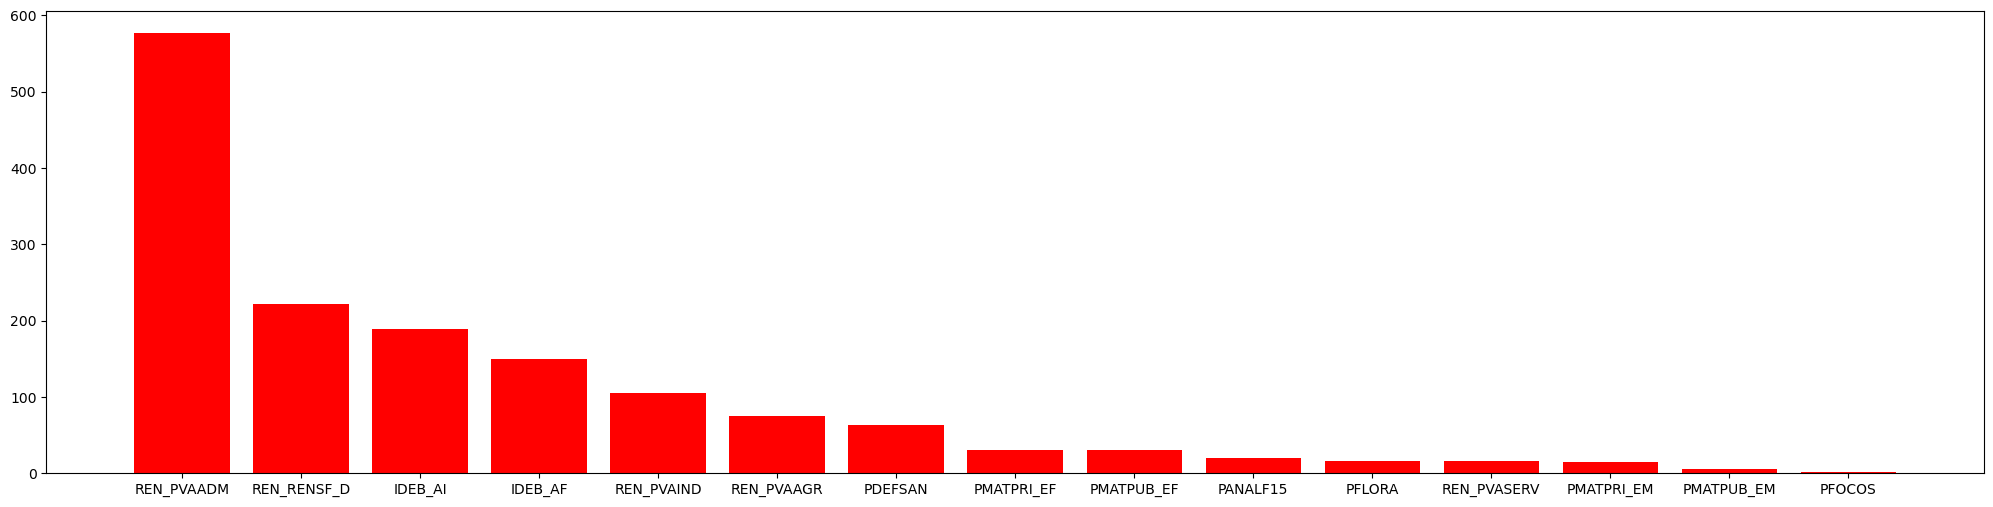

In [113]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(25, 6))
plt.bar(features, fit.scores_[indices[range(15)]], color='r', align='center')
plt.show();

In [65]:
reg_adm.columns

Index(['IBGE7', 'PMATPUB_EF', 'PMATPUB_EM', 'PMATPRI_EF', 'PMATPRI_EM',
       'IDEB_AI', 'IDEB_AF', 'REN_RENSF_D', 'PDEFSAN', 'PANALF15', 'PFOCOS',
       'PFLORA', 'REN_PIBPC_D', 'REN_VAPC_D', 'REN_PVAAGR', 'REN_PVAIND',
       'REN_PVAADM', 'REN_PVASERV'],
      dtype='object')